BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath,
                     parse_dates=['created'], # Parse column as a DateTime object
                     index_col= ['created']) # Set object as the index of the DataFrame
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Engineer features
    # Add column length of description
    df['desc_len']= df['description'].str.len()
    # Add column total number of rooms (beds & baths)
    df['total_rooms']= df['bedrooms'] + df['bathrooms']
    # Add column cats_dogs 
    df['cats_dogs'] = (df['cats_allowed'] + df['dogs_allowed'] == 2).astype(int)
    
    return df.sort_index()

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will be parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [ ]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.

# Check shape of the data set
print(df.shape)

# Display the first 10 columns
df.head(10)

(47260, 36)


bathrooms  bedrooms  \
created                                    
2016-04-01 22:12:41        1.0         1   
2016-04-01 22:56:00        1.0         0   
2016-04-01 22:57:15        2.0         3   
2016-04-01 23:26:07        1.0         1   
2016-04-02 00:48:13        1.0         1   
2016-04-02 01:11:13        1.0         1   
2016-04-02 01:11:30        1.0         2   
2016-04-02 01:11:31        1.0         1   
2016-04-02 01:11:34        1.0         1   
2016-04-02 01:11:40        1.0         2   

                                                           description  \
created                                                                  
2016-04-01 22:12:41  X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...   
2016-04-01 22:56:00  This Enormous Studio Features: Harwood Floors,...   
2016-04-01 22:57:15  --- East 31st St & Lexington Avenue --- This S...   
2016-04-01 23:26:07  Reduced Fee!! Priced To Rent!\rLarge Newly Upd...   
2016-04-02 00:48:13  Phenomenal deal of the century!! This spacious...   
2016-04-02 01:11:13  Just in time for enjoying Spring/Summer, this ...   
2016-04-02 01:11:30  photos coming soon...............................   
2016-04-02 01:11:31  NO FEE Recently renovated, the oversized apart...   
2016-04-02 01:11:34  This is a steal in the heart of East Village!!...   
2016-04-02 01:11:40  Fantastic two bedroom apartment in PRIME Inwoo...   

                                     display_address  latitude  longitude  \
created                                                                     
2016-04-01 22:12:41                      Astor Place   40.7302   -73.9924   
2016-04-01 22:56:00                 East 54th Street   40.7576   -73.9677   
2016-04-01 22:57:15  East 31st St & Lexington Avenue   40.7388   -73.9851   
2016-04-01 23:26:07                     West End Ave   40.7939   -73.9738   
2016-04-02 00:48:13                    E 88th street   40.7784   -73.9491   
2016-04-02 01:11:13                     Rector Place   40.7091   -74.0182   
2016-04-02 01:11:30                 East 21st Street   40.7366   -73.9826   
2016-04-02 01:11:31                     First Avenue   40.7318   -73.9822   
2016-04-02 01:11:34                 East 12th Street   40.7314   -73.9864   
2016-04-02 01:11:40                    Seaman Avenue   40.8689   -73.9225   

                     price        street_address interest_level  elevator  \
created                                                                     
2016-04-01 22:12:41   3195         1 Astor Place           high         1   
2016-04-01 22:56:00   2000  230 East 54th Street         medium         0   
2016-04-01 22:57:15   5850  105 Lexington Avenue           high         1   
2016-04-01 23:26:07   2745      700 West End Ave         medium         1   
2016-04-02 00:48:13   2400     401 E 88th street         medium         1   
2016-04-02 01:11:13   3650      380 Rector Place            low         0   
2016-04-02 01:11:30   3150  240 East 21st Street            low         0   
2016-04-02 01:11:31   3325      252 First Avenue            low         0   
2016-04-02 01:11:34   2795  233 East 12th Street            low         0   
2016-04-02 01:11:40   2400     145 Seaman Avenue            low         0   

                     ...  new_construction  terrace  exclusive  loft  \
created              ...                                               
2016-04-01 22:12:41  ...                 0        0          0     0   
2016-04-01 22:56:00  ...                 0        0          0     0   
2016-04-01 22:57:15  ...                 0        0          0     0   
2016-04-01 23:26:07  ...                 0        0          0     0   
2016-04-02 00:48:13  ...                 0        0          0     0   
2016-04-02 01:11:13  ...                 0        0          0     0   
2016-04-02 01:11:30  ...                 0        0          0     0   
2016-04-02 01:11:31  ...                 0        0          0     0   
2016-04-02 01:11:34  ...         

In [ ]:
# Check for null values
df.isnull().sum().sum()

0

In [ ]:
# Summary stats for numerical variables
df.describe()

bathrooms      bedrooms      latitude     longitude         price  \
count  47260.000000  47260.000000  47260.000000  47260.000000  47260.000000   
mean       1.203364      1.544012     40.750689    -73.972736   3578.041536   
std        0.472804      1.108318      0.038839      0.028964   1765.210584   
min        0.000000      0.000000     40.575700    -74.087300   1375.000000   
25%        1.000000      1.000000     40.728200    -73.991800   2500.000000   
50%        1.000000      1.000000     40.751600    -73.978000   3150.000000   
75%        1.000000      2.000000     40.773900    -73.955000   4095.000000   
max       10.000000      8.000000     40.989400    -73.700100  15500.000000   

           elevator  cats_allowed  hardwood_floors  dogs_allowed  \
count  47260.000000  47260.000000     47260.000000  47260.000000   
mean       0.521075      0.474884         0.492044      0.443377   
std        0.499561      0.499374         0.499942      0.496789   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      0.000000         0.000000      0.000000   
50%        1.000000      0.000000         0.000000      0.000000   
75%        1.000000      1.000000         1.000000      1.000000   
max        1.000000      1.000000         1.000000      1.000000   

            doorman  ...  new_construction      terrace     exclusive  \
count  47260.000000  ...      47260.000000  47260.00000  47260.000000   
mean       0.426153  ...          0.053618      0.04744      0.032628   
std        0.494522  ...          0.225265      0.21258      0.177663   
min        0.000000  ...          0.000000      0.00000      0.000000   
25%        0.000000  ...          0.000000      0.00000      0.000000   
50%        0.000000  ...          0.000000      0.00000      0.000000   
75%        1.000000  ...          0.000000      0.00000      0.000000   
max        1.000000  ...          1.000000      1.00000      1.000000   

               loft  garden_patio  wheelchair_access  common_outdoor_space  \
count  47260.000000  47260.000000       47260.000000          47260.000000   
mean       0.044033      0.040626           0.028121              0.026280   
std        0.205171      0.197425           0.165320              0.159969   
min        0.000000      0.000000           0.000000              0.000000   
25%        0.000000      0.000000           0.000000              0.000000   
50%        0.000000      0.000000           0.000000              0.000000   
75%        0.000000      0.000000           0.000000              0.000000   
max        1.000000      1.000000           1.000000              1.000000   

           desc_len   total_rooms     cats_dogs  
count  47260.000000  47260.000000  47260.000000  
mean     620.265023      2.747376      0.442742  
std      383.555995      1.414901      0.496716  
min        1.000000      0.000000      0.000000  
25%      360.000000      2.000000      0.000000  
50%      575.000000      2.000000      0.000000  
75%      819.000000      4.000000      1.000000  
max     4466.000000     12.000000      1.000000  

[8 rows x 32 columns]

In [ ]:
# Length of 'description'
# df['desc_len']= df['description'].str.len().head() #to capture the length of the string

In [ ]:
# Total number of beds and baths
# df['total_rooms']= df['bedrooms'] + df['bathrooms']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47260 entries, 2016-04-01 22:12:41 to 2016-06-29 21:41:47
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             47260 non-null  float64
 1   bedrooms              47260 non-null  int64  
 2   description           47260 non-null  object 
 3   display_address       47260 non-null  object 
 4   latitude              47260 non-null  float64
 5   longitude             47260 non-null  float64
 6   price                 47260 non-null  int64  
 7   street_address        47260 non-null  object 
 8   interest_level        47260 non-null  object 
 9   elevator              47260 non-null  int64  
 10  cats_allowed          47260 non-null  int64  
 11  hardwood_floors       47260 non-null  int64  
 12  dogs_allowed          47260 non-null  int64  
 13  doorman               47260 non-null  int64  
 14  dishwasher            47260 non-nul

In [ ]:
# Cats and dogs allowed
# df['cats_dogs'] = (df['cats_allowed'] + df['dogs_allowed'] == 2).astype(int) # cast it as an integer

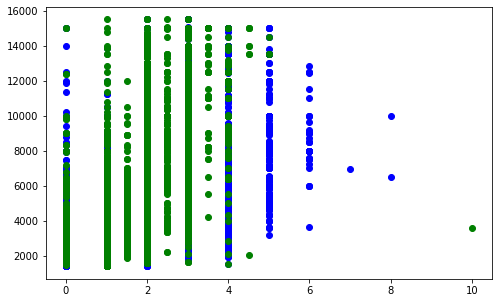

In [ ]:
# Visualize data(# of rooms - beds & baths)
plt.subplots(figsize=(8,5))
plt.scatter(x='bedrooms', y='price', color='blue', data=df)
plt.scatter(x='bathrooms', y='price', color='green', data=df)
plt.show();

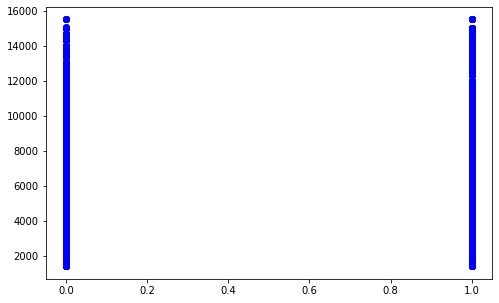

In [ ]:
# Visualize data(Pets allowed - cats & dogs)
plt.subplots(figsize=(8,5))
plt.scatter(x='cats_allowed', y='price', color='gray', data=df)
plt.scatter(x='dogs_allowed', y='price', color='blue', data=df)
plt.show();

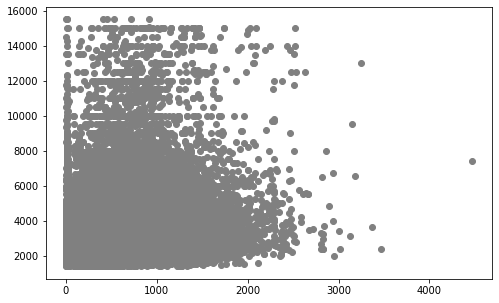

In [ ]:
# Visualize data(Decription length)
plt.subplots(figsize=(8,5))
plt.scatter(x='desc_len', y='price', color='gray', data=df)
plt.show();

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
# Define feature X and target y
target = 'price'
X = df.select_dtypes('number').drop(columns=target) # select only numerical variables and remove target column
y = df[target]

In [ ]:
# Look at the shape of the feature matrix and vector
X.shape, y.shape

((47260, 31), (47260,))

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
# Time series train-test split
cutoff = '2016-06-01'
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask] # invert the mask

# Sanity Check
assert len(X_test) + len(X_train) == len(X)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30806 entries, 2016-04-01 22:12:41 to 2016-05-31 23:10:48
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             30806 non-null  float64
 1   bedrooms              30806 non-null  int64  
 2   latitude              30806 non-null  float64
 3   longitude             30806 non-null  float64
 4   elevator              30806 non-null  int64  
 5   cats_allowed          30806 non-null  int64  
 6   hardwood_floors       30806 non-null  int64  
 7   dogs_allowed          30806 non-null  int64  
 8   doorman               30806 non-null  int64  
 9   dishwasher            30806 non-null  int64  
 10  no_fee                30806 non-null  int64  
 11  laundry_in_building   30806 non-null  int64  
 12  fitness_center        30806 non-null  int64  
 13  pre-war               30806 non-null  int64  
 14  laundry_in_unit       30806 non-nul

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16454 entries, 2016-06-01 01:10:37 to 2016-06-29 21:41:47
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             16454 non-null  float64
 1   bedrooms              16454 non-null  int64  
 2   latitude              16454 non-null  float64
 3   longitude             16454 non-null  float64
 4   elevator              16454 non-null  int64  
 5   cats_allowed          16454 non-null  int64  
 6   hardwood_floors       16454 non-null  int64  
 7   dogs_allowed          16454 non-null  int64  
 8   doorman               16454 non-null  int64  
 9   dishwasher            16454 non-null  int64  
 10  no_fee                16454 non-null  int64  
 11  laundry_in_building   16454 non-null  int64  
 12  fitness_center        16454 non-null  int64  
 13  pre-war               16454 non-null  int64  
 14  laundry_in_unit       16454 non-nul

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
# Calculate the mean of y_train 
y_train_mean = y_train.mean()

# Create list y_pred with same length as y_train
y_pred = [y_train_mean] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_pred)
print('Mean of y_train (Apartment Rent):', y_train_mean)
print('Baseline MAE:', baseline_mae)

Mean of y_train (Apartment Rent): 3573.2410569369604
Baseline MAE: 1202.3983007818476


**Comment:** If we always guessed that the rent for an apartment would be $3, 573.

That means on average, we would be off by $1,202.

# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
# Step 1: Import predictor class
# Imported at the beginning of the notebook 

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [ ]:
# Make predictions
y_pred_train_model = model.predict(X_train)
y_pred_test_model = model.predict(X_test)

In [ ]:
# Check performance metrics
training_mae = mean_absolute_error(y_train, y_pred_train_model)
test_mae = mean_absolute_error(y_test, y_pred_test_model)

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.5825870871208
Test MAE: 701.1773006806592


**Comment:** The performance metrics for the training and test data are very similar. The Mean Absolute Error for our training data is less than the Mean Absolute Error for the testing data. Which means that the performance of our training set was better than the performance of the testing set. Since the metrics are pretty similar, we can say that our model is generalizing well.

**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = r2_score(y_train, y_pred_train_model)
test_r2 = r2_score(y_test, y_pred_test_model)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6164320027205022
Test MAE: 0.6261548870791152


In [ ]:
# Alternative way to get the score
# training_r2 = model.score(X_train, y_train)
# test_r2 = model.score(X_test, y_test)
# print('Training MAE:', training_r2)
# print('Test MAE:', test_r2)

Training MAE: 0.6164320027205022
Test MAE: 0.6261548870791152


**Comment:** The performance metrics are very close to each other. It doesn't seem to be overfitted. The model doesn't have a great performance, but it generalizes well.

# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [ ]:
# Intercept
intercept = model.intercept_
print('Intercept:\n:', intercept)

# Slopes/Coefficients
coefficients = model.coef_
print('\nCoefficients:\n', coefficients)

# Features / Independent Variables
features = X_train.columns
print('\nColumn Names:\n', features)

Intercept:
: -1071239.2268087133

Coefficients:
 [ 1.01608830e+03 -2.70523243e+02  1.62768342e+03 -1.35912345e+04
  1.31808196e+02 -4.64507536e+01 -2.06326439e+02 -1.98678705e+02
  4.77702333e+02  5.41662155e+01 -1.66841075e+02 -2.55347417e+02
  1.32261728e+02 -6.65146398e+01  4.97679987e+02 -1.62292567e+02
 -1.12793909e+02  2.47385688e+02 -3.37147115e+02 -4.79220931e+01
  6.13626263e+01 -1.40237739e+02  1.81880197e+02  1.43215041e+02
  1.14924381e+02 -4.63466420e+01  1.88908624e+02 -8.16823375e+01
  4.32317343e-02  7.45565061e+02  2.95754188e+02]

Column Names:
 Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
     

In [ ]:
# Sort coefficients by absolute value
pd.Series(coefficients, index=features).sort_values(key=abs, ascending=False).head(3)


longitude   -13591.234455
latitude      1627.683419
bathrooms     1016.088304
dtype: float64

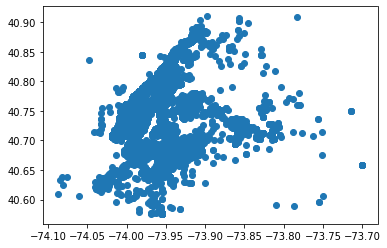

In [ ]:
plt.scatter(X_train['longitude'], X_train['latitude']);

Longitude and Latitude are very influencial in the rent price of an apartment.

The model tells us that for every increase in longitude, as we move from west to east, the price of rent decreases.

For every change in latitude, as you move from south to north, apartment rent prices get more expensive.